# SCA Challenge - Fraudulent Postings

The analysis below was conducted using python3.

The goal of this analysis is to find out which industry has the highest number of fake job postings.

## Exploring the data

In [111]:
import pandas as pd

dataset = pd.read_csv('./dataset.csv')

Let's take a quick look at the data.

**Checking for duplicate rows**

In [112]:
print(f"Number of duplicate rows : {dataset.duplicated().sum()}")
dataset.sample(5)

Number of duplicate rows : 0


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
4778,4779,Drinking Water/Wastewater Operator,"US, CA, 96080",NaN,NaN,NaN,Drinking Water/Wastewater Operator (Part-Time)...,NaN,NaN,0,0,0,Part-time,Associate,NaN,Oil & Energy,NaN,0
8377,8378,Phone Sales,"US, CA, Encino",Outbound Sales,NaN,"For over 20 years NAC Marketing Company, LLC d...",Hours: Monday through Friday 1:00pm-9:00pm St...,Requirements: 6 months work experienceHigh sch...,Benefits: We believe in the philosophy ‘be hea...,0,1,1,Full-time,Entry level,High School or equivalent,Consumer Goods,Sales,0
9489,9490,Fall Internship,"US, DC, Washington",NaN,NaN,NaN,"Maybe you’ve got an ear for rhythm, an eye for...",Extensive research experienceExcellent written...,NaN,0,1,1,Temporary,Internship,NaN,Writing and Editing,Research,0
1458,1459,Head of Content,"GB, LND, London",NaN,NaN,Seedcamp is Europe's leading micro-seed invest...,Do you love to write? Are you a tech geek? Do ...,About YouLive and breathe technology and start...,To apply for the role please upload an up-to-d...,0,1,1,Full-time,Associate,Professional,Venture Capital & Private Equity,Information Technology,0
17626,17627,Data Center Migration App Lead for FULL-TIME O...,"US, PA, Harrisburg",NaN,0-0,NaN,Data Center Migration Application Lead / Archi...,NaN,NaN,0,0,0,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1


After confirming that there are no duplicate rows in the dataset, we can proceed. By looking at a sample of rows from the dataset (from the above task), we observe that some entries in the columns like **salary_range** and **benefits** have missing values. Let's take a further look to examine the extent of the damage.

**Checking for misssing values**

In [113]:
print(f"Total number of job postings in the dataset is {len(dataset)}")
dataset.isna().sum()

Total number of job postings in the dataset is 17880


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

We can see that various columns have missing values so we have to deal with them before we can begin our analysis.

**Data Cleaning**

Even though there are several columns with missing values, our major concern in this analysis is to determine the industry with the highest number of fake job postings, therefore only the **industry** and **fraudulent** columns are useful to us. Missing values in other columns will not affect the output of our analysis.

Having covered that, let us deal with the missing values in the industry column; the fraudulent column has no missing values.

In [114]:
dataset = dataset.dropna(subset=['industry'])

Now let's do a quick inspection to make sure all the rows with missing values in the industry column have been removed.

In [115]:
print(f"Number of missing values in the industry column = {dataset.industry.isna().sum()}")
print(f"New number of job postings in the dataset = {len(dataset)}")

Number of missing values in the industry column = 0
New number of job postings in the dataset = 12977


We can see that all rows with missing values in the industry column have been removed.

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12977 entries, 1 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               12977 non-null  int64 
 1   title                12977 non-null  object
 2   location             12879 non-null  object
 3   department           4701 non-null   object
 4   salary_range         2735 non-null   object
 5   company_profile      10858 non-null  object
 6   description          12977 non-null  object
 7   requirements         11659 non-null  object
 8   benefits             8509 non-null   object
 9   telecommuting        12977 non-null  int64 
 10  has_company_logo     12977 non-null  int64 
 11  has_questions        12977 non-null  int64 
 12  employment_type      12686 non-null  object
 13  required_experience  10190 non-null  object
 14  required_education   9235 non-null   object
 15  industry             12977 non-null  object
 16  func

There are now 18 columns and 12977 rows in this dataset, and all the entries are of correct and usable data types for our analysis.

## Key insights
From our remaing data, we'll extract the columns we will be working with which are **'industry'** and **'fraudulent'**. 

In [117]:
industry_and_fraudulent = dataset[['industry', 'fraudulent']]
industry_and_fraudulent

,industry,fraudulent
1,Marketing and Advertising,0
3,Computer Software,0
4,Hospital & Health Care,0
6,Online Media,0
8,Information Technology and Services,0
...,...,...
17874,Computer Software,0
17875,Computer Software,0
17876,Internet,0
17878,Graphic Design,0


Next, let us take a look at the distribution of fraudulent and non-fraudulent postings across various industries.

In [118]:
industry_and_fraudulent['fraudulent'].value_counts()

0    12386
1      591
Name: fraudulent, dtype: int64

Now we can see that out of the 12977 postings, **591 are fraudulent** and **12386 are not fraudulent**. Our next step now is to see how the 591 fraudulent postings are distributed across all the industries.

In [125]:
# Recall industry_vs_fraudulent = dataset[['industry', 'fraudulent']]

fraud_dist = industry_and_fraudulent.groupby('industry').sum().reset_index().sort_values(('fraudulent'), ascending=False)
fraud_dist = fraud_dist.rename(columns = {'fraudulent': 'fraud_count'})

print(f"Sum total of all fraudulent postings = {fraud_dist['fraud_count'].sum()}")
fraud_dist

Sum total of all fraudulent postings = 591


,industry,fraud_count
88,Oil & Energy,109
0,Accounting,57
51,Hospital & Health Care,51
75,Marketing and Advertising,45
39,Financial Services,35
...,...,...
61,Internet,0
60,International Trade and Development,0
56,Industrial Automation,0
55,Individual & Family Services,0


In [129]:
print(f"The industry with the highest number of fraudulent postings is {fraud_dist['industry'].head(1).item()} with {fraud_dist['fraud_count'].head(1).item()} fraudulent postings.")


The industry with the highest number of fraudulent postings is Oil & Energy with 109 fraudulent postings.


As we can see from above, the industry with the most fraudulent postings is Oil and Energy. Also, we can see that there are a number of industries that have zero fraudulent postings. Now, let's visualise this data!

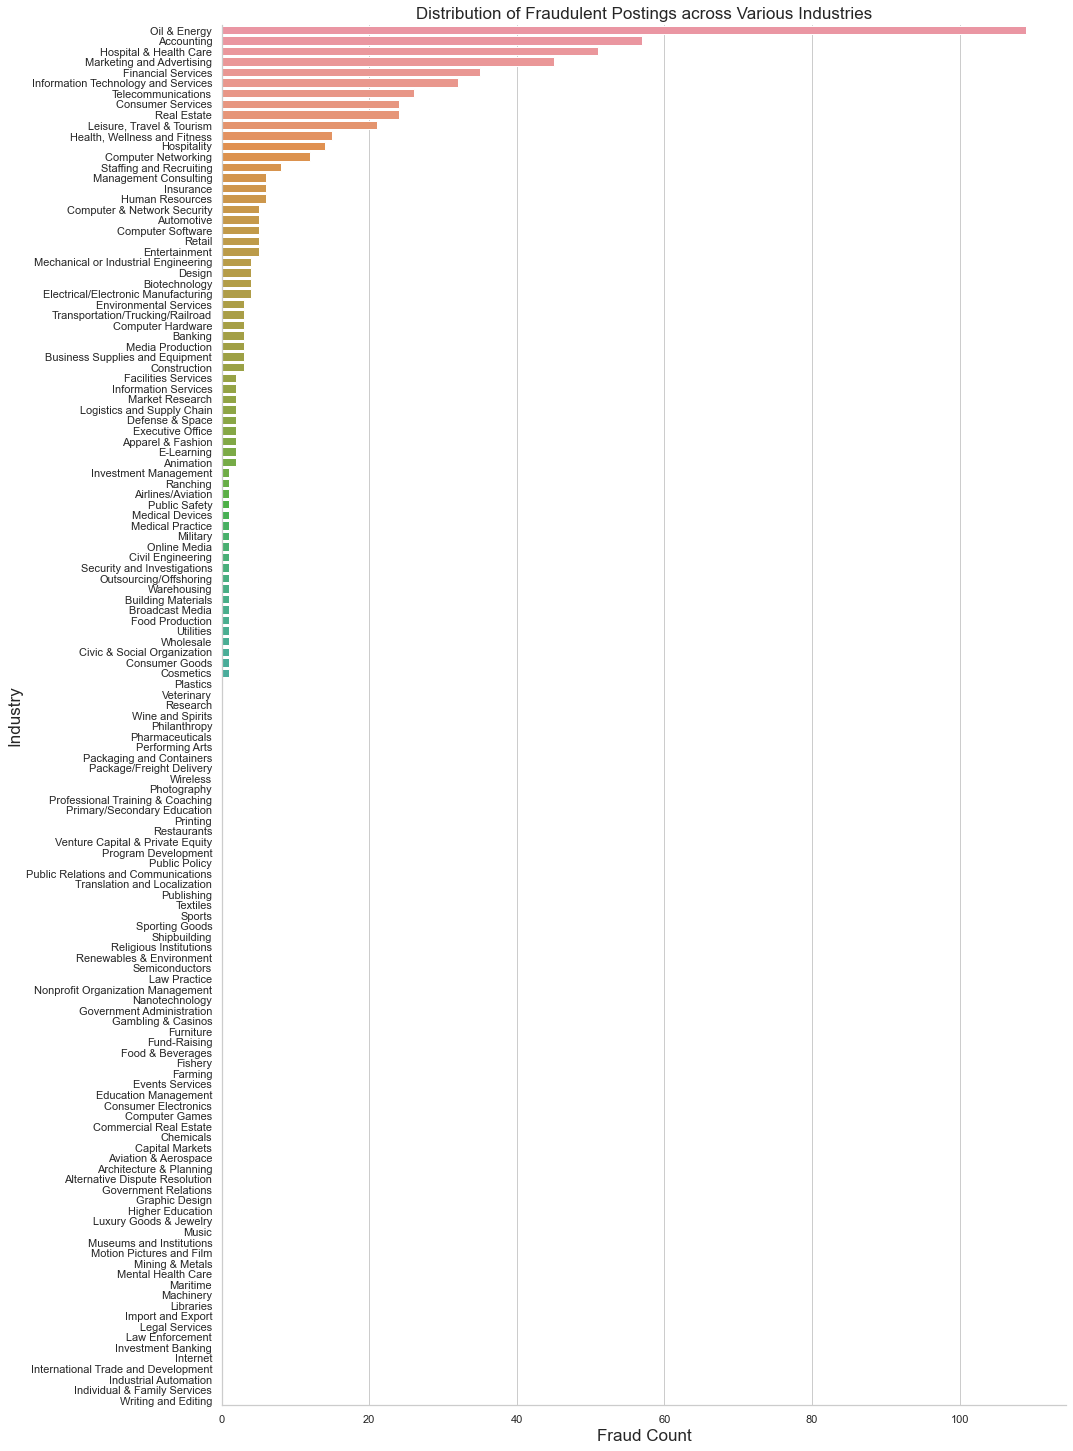

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.catplot(x='fraud_count', y='industry', data=fraud_dist, kind='bar', height=20, aspect= 15/20)

plt.title('Distribution of Fraudulent Postings across Various Industries', size = 17)
plt.xlabel('Fraud Count', size =17)
plt.ylabel('Industry', size = 17)
plt.show()